In [8]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.datasets import get_rdataset
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
air = get_rdataset("AirPassengers").data

In [5]:
air = air["value"]

In [6]:
air

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: value, Length: 144, dtype: int64

In [13]:
air.shape

(144,)

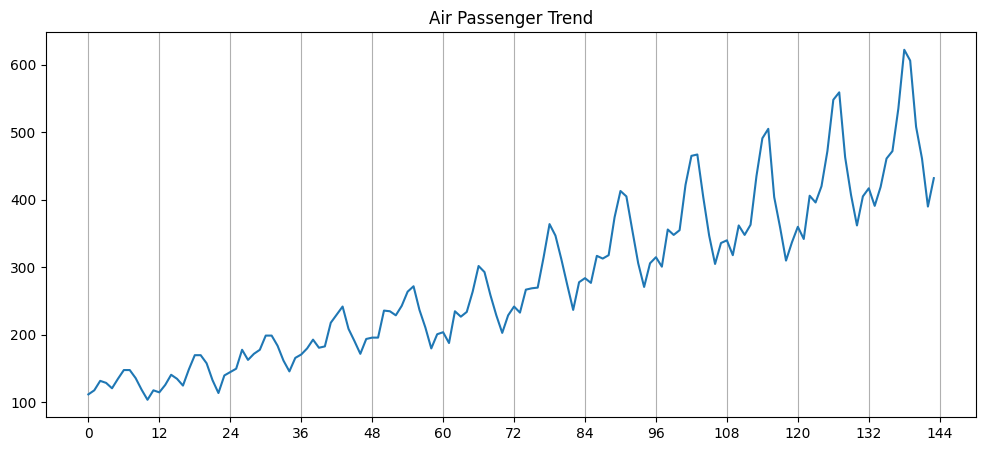

In [16]:
plt.figure(figsize=(12, 5))
plt.title("Air Passenger Trend")
plt.grid(axis="x")
plt.xticks(range(0, 145, 12))
plt.plot(air)
plt.show()

In [17]:
best_pdq = None
best_aic = np.inf

In [18]:
for p in range(8, 14):
    for d in range(1, 5):
        for q in range(3, 8):
            try:
                m = ARIMA(air, order=(p, d, q))
                re = m.fit()
                if re.aic < best_aic:
                    best_aic = re.aic
                    best_pdq = (p, d, q)
            except:
                print("Inside Except")
                continue

In [19]:
best_aic

1139.2729207530126

In [20]:
best_pdq

(11, 2, 3)

In [21]:
model = ARIMA(air, order=best_pdq)

In [22]:
result = model.fit()

In [23]:
months = 12

In [24]:
forecast = result.get_forecast(steps=months)

In [25]:
forecast.predicted_mean

144    448.824163
145    419.544387
146    450.195279
147    491.312713
148    511.230285
149    567.269361
150    656.241701
151    635.331207
152    548.010096
153    493.635371
154    434.439910
155    466.080986
Name: predicted_mean, dtype: float64

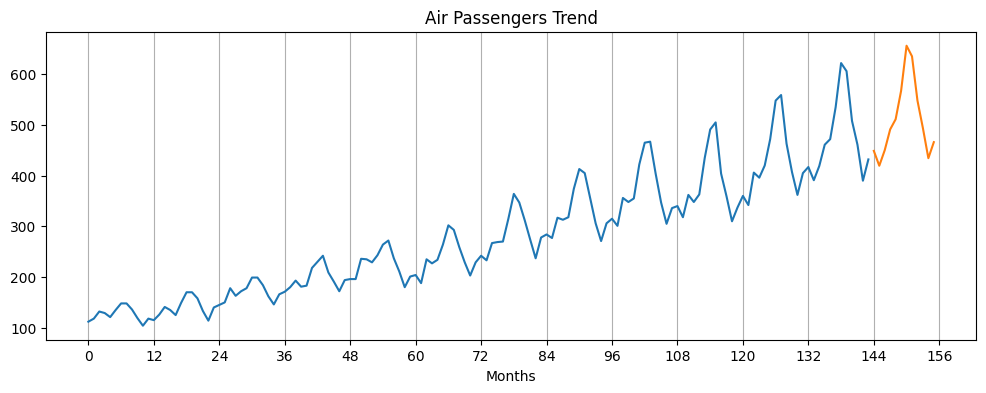

In [29]:
plt.figure(figsize=(12, 4))
plt.title("Air Passengers Trend")
plt.plot(air)
plt.plot(np.arange(144, 156), forecast.predicted_mean)
plt.xlabel("Months")
plt.xticks(range(0, 157, 12))
plt.grid(axis="x")
plt.show()

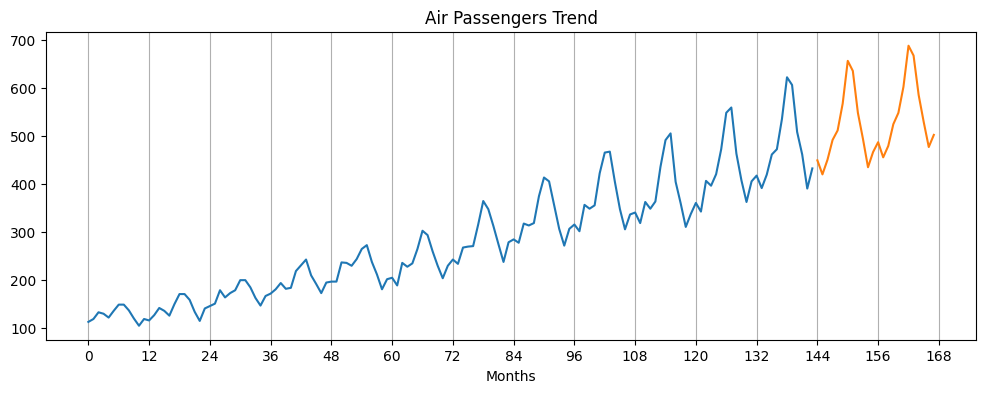

In [30]:
months = 24
forecast = result.get_forecast(steps=months)

plt.figure(figsize=(12, 4))
plt.title("Air Passengers Trend")
plt.plot(air)
plt.plot(np.arange(144, 168), forecast.predicted_mean)
plt.xlabel("Months")
plt.xticks(range(0, 169, 12))
plt.grid(axis="x")
plt.show()